# Analysis of Model


In [1]:
# Packages

# Model
import numpy as np
import tellurium as te
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Dataframe
import pandas as pd
import dataset_long as dsl

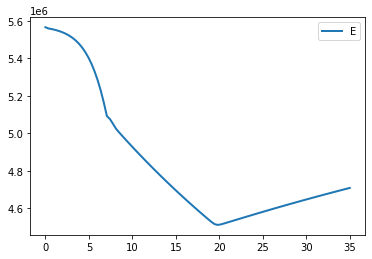

1.3153780456462294

In [2]:
# load model from ant-Data
OIE = te.loada('OIE_model.ant')
result = OIE.simulate(0, 35, 100,  ['time','E'])
OIE.plot(result)
OIE.R_percent

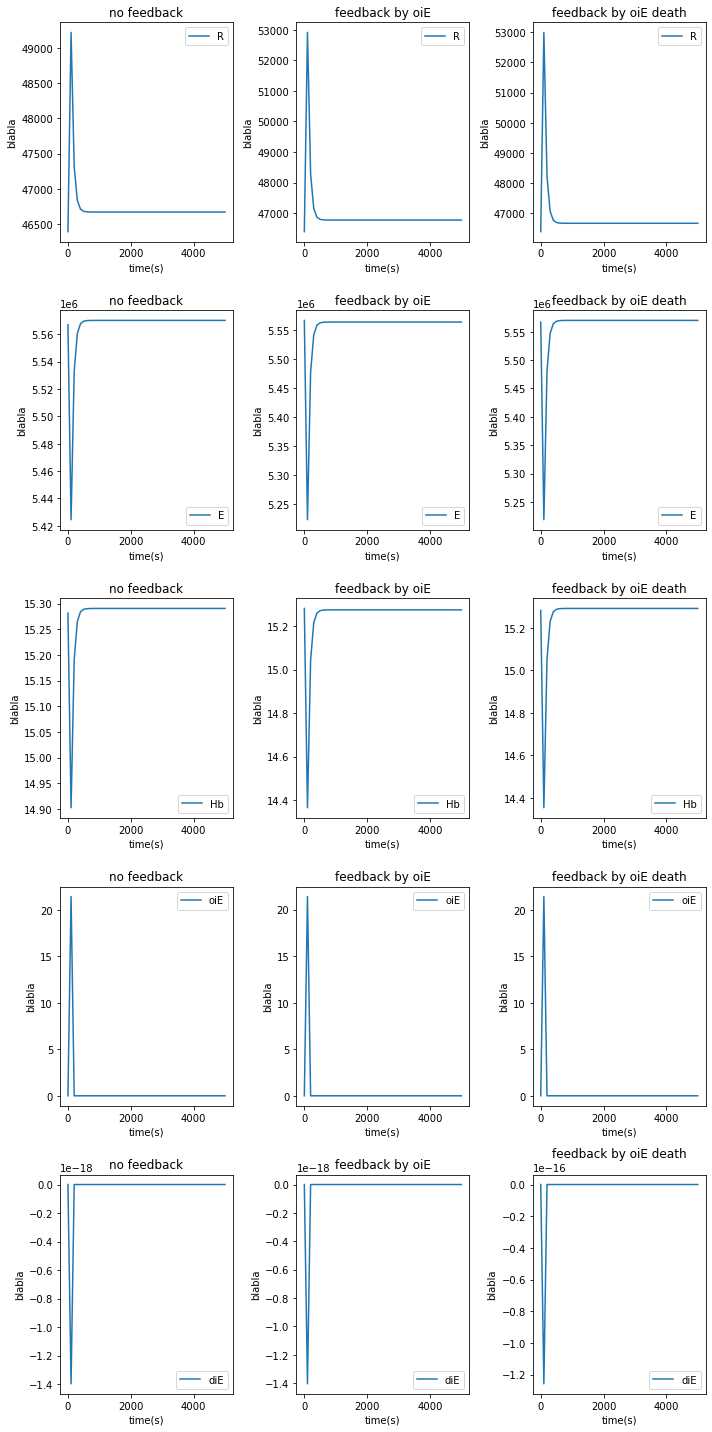

In [13]:
matrix = [5,3]
fig, ax = plt.subplots(matrix[0], matrix[1],figsize=(10,20))  # sharex = 'col', sharerow='row', 

title = ('no feedback', 'feedback by oiE', 'feedback by oiE death')

feedback_change = [[('event_Edeath_cause',0)], [('event_Edeath_cause',1)], [('event_Edeath_cause',2)]]

# Modell wird für jeden Subplot geladen 
for a, pc in enumerate (matrix[0]*feedback_change):
    
    row = a//matrix[1]  #zeilenzahl
    column = a%matrix[1]  #spaltenzahl
    
    rr = te.loada('OIE_model.ant')

    for c in pc:
        rr.setValue(c[0],c[1])
    
    #Modell für unsere Parameter, für die wir uns interessieren (interest) simu,lieren und als Pandadataframe speichern 
    interest_all = [['time','R'], ['time','E'], ['time','Hb'], ['time','oiE'], ['time','diE']]

    interest = interest_all[row]
    result = rr.simulate (0, 5000, selections= interest)
    result_df = pd.DataFrame(result, columns= result.colnames)

    #alle Funktion (s.interest) in selben Subplot zeichnen (jeder Durchlauf eine Funktion, die geplottet wird)
    for i in range(1,len(interest), 1): 
        ax[row,column].plot(result_df[interest[0]], result_df[interest[i]],color=f"C{i-1}", label=interest[i])
        #ax[row,column].set_xlim(0, 50)
    
    #labeling von Subplot
    ax[row, column].set_title(title[column])
    ax[row, column].set(xlabel = "time(s)", ylabel = "blabla")
    ax[row, column].legend()
    
plt.tight_layout()
